In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import visuals as vs

data = pd.read_csv("census.csv")
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


# Exercise 0:
求 n_records， n_greater_50k，n_at_most_50K，greater_percent
以及每一列特征值


In [2]:
n_records = data.shape[0]*data.shape[1]
n_greater_50k = 0
income = data['income']
for s in income:
    if s == ">50K":
        n_greater_50k += 1
n_at_most_50K = data.shape[0] - n_greater_50k
greater_percent = n_greater_50k / (n_greater_50k + n_at_most_50K)

'''
# 用哈希表映射制作每一列的feature value
data_feature = data.loc[:,:]
for i in range(data_feature.shape[1]):
    if i in [0, 3, 9, 10, 11]:
        continue
    dic = {}
    count = 0
    for j in range(data_feature.shape[0]):
        # print(data_feature.iloc[:,i].shape)
        if data_feature.iloc[:, i][j] not in dic:
            dic[data_feature.iloc[:, i][j]] = count
            count += 1
    data_feature.iloc[:, i] = data_feature.iloc[:, i].map(lambda x: dic[x])
print(data_feature)
'''
        

'\n# 用哈希表映射制作每一列的feature value\ndata_feature = data.loc[:,:]\nfor i in range(data_feature.shape[1]):\n    if i in [0, 3, 9, 10, 11]:\n        continue\n    dic = {}\n    count = 0\n    for j in range(data_feature.shape[0]):\n        # print(data_feature.iloc[:,i].shape)\n        if data_feature.iloc[:, i][j] not in dic:\n            dic[data_feature.iloc[:, i][j]] = count\n            count += 1\n    data_feature.iloc[:, i] = data_feature.iloc[:, i].map(lambda x: dic[x])\nprint(data_feature)\n'

E:\Pycharm-work\integral\machine learning\homework_1\visuals.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


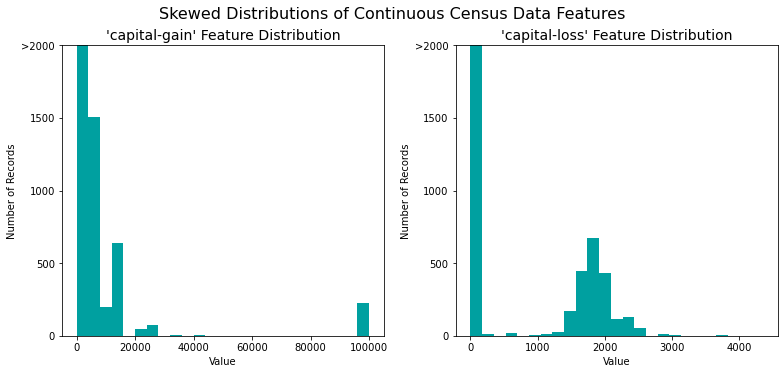

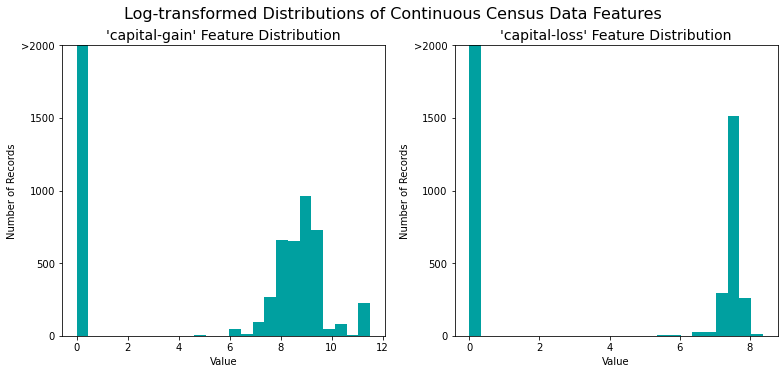

In [3]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
vs.distribution(data)
skewed = ['capital-gain','capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
vs.distribution(features_log_transformed, transformed = True)

In [4]:
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain','capital-loss','hours-per-week']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


# Exercise 1:

对非数字的列(除掉label)进行one_hot 编码并归一化 对income 二值化生成标签zero_one_income


In [5]:

features_final = pd.get_dummies(features_raw)
features_final = (features_final - features_final.min()) / (features_final.max() - features_final.min())
income = []
for s in income_raw:
    if s == ">50K":
        income.append(1)
    else:
        income.append(0)

print(income)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 

In [6]:
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features_final, income, test_size=0.2, random_state=0)




# Exercise 2:

选择KNN模型进行预测

In [7]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score



#模型拟合
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)
Y_pre = model.predict(X_test)

knn_f1_score = f1_score(Y_test,Y_pre)
print(knn_f1_score)

0.609040074557316


# Exercise 3:

选用GaussianNB Decision Trees Logistic Regression

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


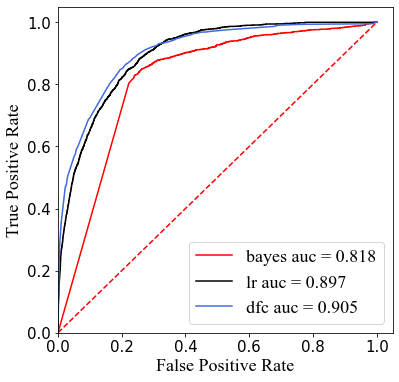

(0.5881340255400405, 0.6278971237617854, 0.6522526554481441)


In [11]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model_bes = GaussianNB()
model_bes.fit(X_train, Y_train)
y1_score = model_bes.predict_proba(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
y2_score = model_lr.predict_proba(X_test)



model_dfc = DecisionTreeClassifier(max_depth=10)
model_dfc.fit(X_train, Y_train)
y3_score = model_dfc.predict_proba(X_test)

y1_pre = model_bes.predict(X_test)
y2_pre = model_lr.predict(X_test)
y3_pre = model_dfc.predict(X_test)


def ks(y_predicted1,  y_predicted2,  y_predicted3, y_true):
    Font = {'size': 18, 'family': 'Times New Roman'}

    label1 = label2 = label3 = y_true
    fpr1, tpr1, thres1 = metrics.roc_curve(label1, y_predicted1[:, 1])
    fpr2, tpr2, thres2 = metrics.roc_curve(label2, y_predicted2[:, 1])
    fpr3, tpr3, thres3 = metrics.roc_curve(label3, y_predicted3[:, 1])
    roc_auc1 = metrics.auc(fpr1, tpr1)
    roc_auc2 = metrics.auc(fpr2, tpr2)
    roc_auc3 = metrics.auc(fpr3, tpr3)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr1, tpr1, 'b', label='bayes auc = %0.3f' % roc_auc1, color='Red')
    plt.plot(fpr2, tpr2, 'b', label='lr auc = %0.3f' % roc_auc2, color='k')
    plt.plot(fpr3, tpr3, 'b', label='dfc auc = %0.3f' % roc_auc3, color='RoyalBlue')
    plt.legend(loc='lower right', prop=Font)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate', Font)
    plt.xlabel('False Positive Rate', Font)
    plt.tick_params(labelsize=15)
    plt.show()
    return abs(fpr1 - tpr1).max(), abs(fpr2 - tpr2).max(), abs(fpr3 - tpr3).max()

print(ks(y1_score,  y2_score,  y3_score, Y_test))

我们设定的决策树分类在(决策树，逻辑斯蒂回归，贝叶斯曲线回归）中表现得更好。
因为决策树更符合人类得决策习惯，且决策树的最大深度为10



# q1: 
随机森林、决策树、XGboost
# q2:
根据天气、交通、人数、健康情况判断去哪儿旅游（决策树模型）
# q3:
决策树模型具有足够的拟合能力，它特别符合人类的决策过程（根据条件决策）；
在训练集和测试集上得分高且对未知数据有很强的泛化能力就表现的好
# q4:
弱点：当数据足够大是，决策树会更加大；树的构建会更加困难；当主要特征在远离根节点时表现很差
# q5:
需要知道影响较大的特征